## Importação de bibliotecas

In [1]:
from tensorflow import keras
from keras import layers
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
import os, shutil

2025-06-12 20:06:21.497301: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749755181.535213     858 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749755181.543829     858 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749755181.575946     858 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749755181.575973     858 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749755181.575976     858 computation_placer.cc:177] computation placer alr

## Funções

In [2]:
def get_true_pred(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset.unbatch().batch(1):
        y_true.append(np.argmax(labels.numpy()))
        pred = model.predict(images, verbose=0)
        y_pred.append(np.argmax(pred))
    return np.array(y_true), np.array(y_pred)

## Carregamento do dataset
Carrega o dataset distribuido pelos diferentes conjuntos de dados.


In [3]:
train_dir = 'Dataset/archive/seg_train'
validation_dir = 'Dataset/archive/seg_val'
test_dir = 'Dataset/archive/seg_test'

train_buildings_dir = 'Dataset/archive/seg_train/buildings/'
train_forest_dir = 'Dataset/archive/seg_train/forest'
train_glacier_dir = 'Dataset/archive/seg_train/glacier'
train_mountain_dir = 'Dataset/archive/seg_train/mountain'
train_sea_dir = 'Dataset/archive/seg_train/sea'
train_street_dir = 'Dataset/archive/seg_train/street'

val_buildings_dir = 'Dataset/archive/seg_val/buildings'
val_forest_dir = 'Dataset/archive/seg_val/forest'
val_glacier_dir = 'Dataset/archive/seg_val/glacier'
val_mountain_dir = 'Dataset/archive/seg_val/mountain'
val_sea_dir = 'Dataset/archive/seg_val/sea'
val_street_dir = 'Dataset/archive/seg_val/street'

test_buildings_dir = 'Dataset/archive/seg_test/buildings'
test_forest_dir = 'Dataset/archive/seg_test/forest'
test_glacier_dir = 'Dataset/archive/seg_test/glacier'
test_mountain_dir = 'Dataset/archive/seg_test/mountain'
test_sea_dir = 'Dataset/archive/seg_test/sea'
test_street_dir = 'Dataset/archive/seg_test/street'

print('total training buildings images:', len(os.listdir(train_buildings_dir)))
print('total training forest images:', len(os.listdir(train_forest_dir)))
print('total training glacier images:', len(os.listdir(train_glacier_dir)))
print('total training mountain images:', len(os.listdir(train_mountain_dir)))
print('total training sea images:', len(os.listdir(train_sea_dir)))
print('total training street images:', len(os.listdir(train_street_dir)))

print('total validation buildings images:', len(os.listdir(val_buildings_dir)))
print('total validation forest images:', len(os.listdir(val_forest_dir)))
print('total validation glacier images:', len(os.listdir(val_glacier_dir)))
print('total validation mountain images:', len(os.listdir(val_mountain_dir)))
print('total validation sea images:', len(os.listdir(val_sea_dir)))
print('total validation street images:', len(os.listdir(val_street_dir)))

print('total test buildings images:', len(os.listdir(test_buildings_dir)))
print('total test forest images:', len(os.listdir(test_forest_dir)))
print('total test glacier images:', len(os.listdir(test_glacier_dir)))
print('total test mountain images:', len(os.listdir(test_mountain_dir)))
print('total test sea images:', len(os.listdir(test_sea_dir)))
print('total test street images:', len(os.listdir(test_street_dir)))


total training buildings images: 1691
total training forest images: 1771
total training glacier images: 1904
total training mountain images: 2012
total training sea images: 1774
total training street images: 1882
total validation buildings images: 500
total validation forest images: 500
total validation glacier images: 500
total validation mountain images: 500
total validation sea images: 500
total validation street images: 500
total test buildings images: 437
total test forest images: 474
total test glacier images: 553
total test mountain images: 525
total test sea images: 510
total test street images: 501


## Distribuição de imagens por classe e por conjunto de dados
As imagens estão distribuidas por 3 conjuntos de dados: train, validation e test.
Cada um desses conjuntos está distribuido por 6 classes: buildings, forest, glacier, mountain, sea e street.

### Número total de imagens por classe:

| Classe     | Treino | Validação | Teste | Total |
|------------|--------|-----------|-------|-------|
| Buildings  | 1691   | 500       | 437   | 2628  |
| Forest     | 1771   | 500       | 474   | 2745  |
| Glacier    | 1904   | 500       | 553   | 2957  |
| Mountain   | 2012   | 500       | 525   | 3037  |
| Sea        | 1774   | 500       | 510   | 2784  |
| Street     | 1882   | 500       | 501   | 2883  |
| **Total**  | **11034** | **3000** | **3000** | **17034** |

### Número total de imagens por conjunto de dados:

| Conjunto de dados | Total |
|-------------------|-------|
| Treino            | 11034 |
| Validação         | 3000  |
| Teste             | 3000  |
| **Total geral**   | **17034** |


# Processamento dos dados

 Carrega, redimensiona e organiza imagens em batches com rótulos one-hot, preparando os dados de treino, validação e teste.

In [4]:
IMG_SIZE = 150
BATCH_SIZE = 32

# Processing the data
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE)

print(test_dataset)
class_names = train_dataset.class_names
print("Classes:", class_names)

Found 11034 files belonging to 6 classes.


I0000 00:00:1749755266.582247     858 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6542 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1


Found 3000 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>
Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


# Modelo (loss: categorical_crossentropy, optimizer: RMSprop)


## Criação da CNN
Criação da CNN que  irá receber imagens de 150x150 píxeis, aplica normalização e passa por quatro camadas convolucionais com max pooling para extrair características, seguidas de uma camada densa com 512 unidades e uma camada de saída softmax para classificação.


In [18]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,686 (13.18 MB)

 Trainable params: 3,455,686 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

None


## Compilação da CNN
Compilação da CNN utilizando a loss **categorical crossentropy** e o optimizer **RMSprop**.

In [6]:
model.compile(
loss='categorical_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

## Definição do callback
Definição de um callback que guarda automaticamente o modelo com a menor perda (loss) de validação durante o treino.

In [7]:
checkpoint_filepath = 'modelS_CatCross_RMS.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True)

## Treino da CNN
Treino da CNN durante 50 épocas utilizando o dataset de validação e o callback para guardar o melhor modelo.

In [8]:
history_CatCross_RMS = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=[model_checkpoint_callback])

Epoch 1/50


I0000 00:00:1749755408.539309    1346 service.cc:152] XLA service 0x78e8400049f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749755408.539356    1346 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2025-06-12 20:10:08.628419: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749755408.886822    1346 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-12 20:10:14.061045: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.12 = (f32[32,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0} %bitcast.2658, f32[32,3,3,3]{3,2,1,0} %bitcast.2459, f32[32]{0} %bitcast.3030), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBia

  5/345 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - acc: 0.1741 - loss: 1.7926 

I0000 00:00:1749755417.195745    1346 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


343/345 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.4793 - loss: 1.3048

2025-06-12 20:10:28.002427: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.12 = (f32[26,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[26,3,150,150]{3,2,1,0} %bitcast.2658, f32[32,3,3,3]{3,2,1,0} %bitcast.2459, f32[32]{0} %bitcast.3030), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-12 20:10:28.052716: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted poten

345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.4797 - loss: 1.3040

2025-06-12 20:10:31.220247: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.12 = (f32[32,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,150,150]{3,2,1,0} %bitcast.569, f32[32,3,3,3]{3,2,1,0} %bitcast.576, f32[32]{0} %bitcast.578), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-12 20:10:31.301916: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentia

345/345 ━━━━━━━━━━━━━━━━━━━━ 32s 60ms/step - acc: 0.4799 - loss: 1.3035 - val_acc: 0.6147 - val_loss: 1.0001
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - acc: 0.6378 - loss: 0.9455 - val_acc: 0.6273 - val_loss: 0.9433
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - acc: 0.6909 - loss: 0.8272 - val_acc: 0.7133 - val_loss: 0.7712
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - acc: 0.7273 - loss: 0.7409 - val_acc: 0.7127 - val_loss: 0.7510
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - acc: 0.7502 - loss: 0.6786 - val_acc: 0.5873 - val_loss: 1.0899
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - acc: 0.7675 - loss: 0.6406 - val_acc: 0.7593 - val_loss: 0.6479
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - acc: 0.7861 - loss: 0.5857 - val_acc: 0.7723 - val_loss: 0.6296
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - acc: 0.8000 - loss: 0.5504 - val_acc: 0.7933 - val_loss: 0.5771
Epoch 9/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/st

In [9]:
best_epoch = np.argmin(history_CatCross_RMS.history['val_loss']) + 1
print(f"Melhor época (menor val_loss): {best_epoch}")

Melhor época (menor val_loss): 14


## Carregamento do modelo e validação
Carregamento e avaliação do modelo através do valor da accuracy.

In [10]:
modelS_CatCross_RMS = keras.models.load_model('modelS_CatCross_RMS.keras')
val_loss, val_acc = modelS_CatCross_RMS.evaluate(validation_dataset)
print('val_acc:', val_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8345 - loss: 0.4762
val_acc: 0.824999988079071


Representação gráfica dos valores da accuracy e da loss ao longo das épocas.

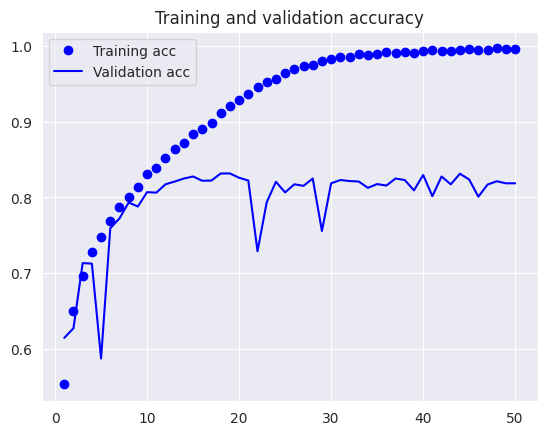

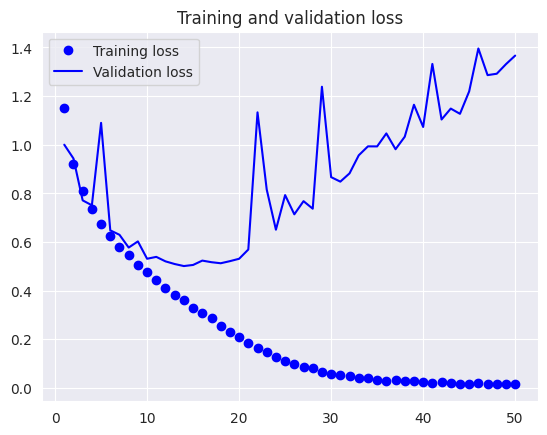

In [11]:
acc = history_CatCross_RMS.history['acc']
val_acc = history_CatCross_RMS.history['val_acc']
loss = history_CatCross_RMS.history['loss']
val_loss = history_CatCross_RMS.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Avaliação da performance do modelo no conjunto de teste, utilizando o relatório de classificação. O relatório apresenta, para cada classe, as métricas precision, recall e F1-score, permitindo analisar detalhadamente os acertos e erros por classe.

In [12]:
y_true, y_pred = get_true_pred(modelS_CatCross_RMS, test_dataset)
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
class_only_report = {k: v for k, v in report.items() if k in class_names}
df = pd.DataFrame(class_only_report).T
print(df[['precision', 'recall', 'f1-score']].round(3))


2025-06-12 20:22:12.173160: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentially buggy algorithm eng14{} for conv %cudnn-conv-bias-activation.12 = (f32[1,32,148,148]{3,2,1,0}, u8[0]{0}) custom-call(f32[1,3,150,150]{3,2,1,0} %bitcast.262, f32[32,3,3,3]{3,2,1,0} %bitcast.269, f32[32]{0} %bitcast.271), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", metadata={op_type="Conv2D" op_name="functional_1/conv2d_1/convolution" source_file="/home/diogo/.pyenv/versions/3.10.18/lib/python3.10/site-packages/tensorflow/python/framework/ops.py" source_line=1200}, backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false}
2025-06-12 20:22:12.250748: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:549] Omitted potentiall

           precision  recall  f1-score
buildings      0.778   0.828     0.803
forest         0.959   0.930     0.944
glacier        0.846   0.714     0.775
mountain       0.798   0.792     0.795
sea            0.809   0.849     0.829
street         0.803   0.884     0.841


2025-06-12 20:25:36.900883: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Modelo (loss: KLDivergence, optimizer: SGD)

## Criação da CNN
Criação da CNN que irá receber imagens de 150x150 píxeis, aplica normalização e passa por quatro camadas convolucionais com max pooling para extrair características, seguidas de uma camada densa com 512 unidades e uma camada de saída softmax para classificação.

In [19]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,686 (13.18 MB)

 Trainable params: 3,455,686 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

None


## Compilação da CNN
Compilação da CNN utilizando a loss **KLDivergence** e o optimizer **SGD**.

In [22]:
model.compile(
loss=tf.keras.losses.KLDivergence(),
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
metrics=['acc'])

## Definição do callback
Definição de um callback que guarda automaticamente o modelo com a menor perda (loss) de validação durante o treino.

In [23]:
checkpoint_filepath = 'modelS_KLD_SGD.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True)

## Treino da CNN
Treino da CNN durante 50 épocas utilizando o dataset de validação e o callback para guardar o melhor modelo.

In [24]:
history_KLD_SGD = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=[model_checkpoint_callback])

Epoch 1/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - acc: 0.2734 - loss: 1.6998 - val_acc: 0.5510 - val_loss: 1.1666
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - acc: 0.5540 - loss: 1.1383 - val_acc: 0.5503 - val_loss: 1.1265
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - acc: 0.5951 - loss: 1.0223 - val_acc: 0.5517 - val_loss: 1.1783
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - acc: 0.6254 - loss: 0.9684 - val_acc: 0.6033 - val_loss: 0.9922
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - acc: 0.6522 - loss: 0.9054 - val_acc: 0.6173 - val_loss: 0.9913
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - acc: 0.6746 - loss: 0.8651 - val_acc: 0.6667 - val_loss: 0.8426
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - acc: 0.6883 - loss: 0.8153 - val_acc: 0.6953 - val_loss: 0.7875
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - acc: 0.7067 - loss: 0.7811 - val_acc: 0.7007 - val_loss: 0.7920
Epoch 9/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 

In [25]:
best_epoch = np.argmin(history_KLD_SGD.history['val_loss']) + 1
print(f"Melhor época (menor val_loss): {best_epoch}")

Melhor época (menor val_loss): 18


## Carregamento do modelo e validação
Carregamento e avaliação do modelo através do valor da accuracy.

In [26]:
modelS_KLD_SGD = keras.models.load_model('modelS_KLD_SGD.keras')
val_loss, val_acc = modelS_KLD_SGD.evaluate(validation_dataset)
print('val_acc:', val_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.7871 - loss: 0.5720
val_acc: 0.781000018119812


Representação gráfica dos valores da accuracy e da loss ao longo das épocas.

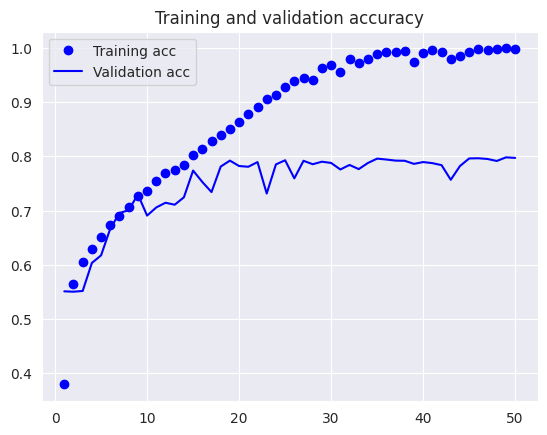

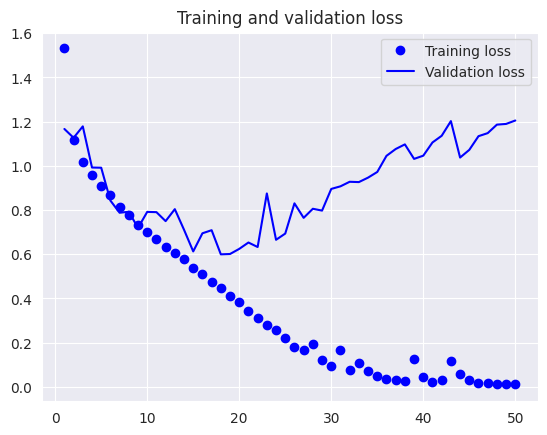

In [27]:
acc = history_KLD_SGD.history['acc']
val_acc = history_KLD_SGD.history['val_acc']
loss = history_KLD_SGD.history['loss']
val_loss = history_KLD_SGD.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Avaliação da performance do modelo no conjunto de teste, utilizando o relatório de classificação. O relatório apresenta, para cada classe, as métricas precision, recall e F1-score, permitindo analisar detalhadamente os acertos e erros por classe.

In [28]:
y_true, y_pred = get_true_pred(modelS_KLD_SGD, test_dataset)
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
class_only_report = {k: v for k, v in report.items() if k in class_names}
df = pd.DataFrame(class_only_report).T
print(df[['precision', 'recall', 'f1-score']].round(3))

           precision  recall  f1-score
buildings      0.732   0.769     0.750
forest         0.933   0.876     0.903
glacier        0.689   0.807     0.743
mountain       0.774   0.737     0.755
sea            0.771   0.747     0.759
street         0.846   0.768     0.805


2025-06-12 20:52:07.769680: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Model (loss: categorical_crossentropy, optimizer: SGD)

## Criação da CNN
Criação da CNN que irá receber imagens de 150x150 píxeis, aplica normalização e passa por quatro camadas convolucionais com max pooling para extrair características, seguidas de uma camada densa com 512 unidades e uma camada de saída softmax para classificação.


In [33]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,686 (13.18 MB)

 Trainable params: 3,455,686 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

None


## Compilação da CNN
Compilação da CNN utilizando a loss **categorical crossentropy** e o optimizer **SGD**.

In [34]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['acc'])

## Definição do callback
Definição de um callback que guarda automaticamente o modelo com a menor perda (loss) de validação durante o treino.

In [35]:
checkpoint_filepath = 'modelS_CatCross_SGD.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True)

## Treino da CNN
Treino da CNN durante 50 épocas utilizando o dataset de validação e o callback para guardar o melhor modelo.

In [36]:
history_CatCross_SGD = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=[model_checkpoint_callback])

Epoch 1/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - acc: 0.3117 - loss: 1.6749 - val_acc: 0.5253 - val_loss: 1.2196
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - acc: 0.5506 - loss: 1.1587 - val_acc: 0.5393 - val_loss: 1.1288
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - acc: 0.6010 - loss: 1.0195 - val_acc: 0.6223 - val_loss: 0.9644
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - acc: 0.6281 - loss: 0.9593 - val_acc: 0.6510 - val_loss: 0.9041
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - acc: 0.6553 - loss: 0.8868 - val_acc: 0.6363 - val_loss: 0.9463
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - acc: 0.6709 - loss: 0.8480 - val_acc: 0.7040 - val_loss: 0.7910
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - acc: 0.7075 - loss: 0.7865 - val_acc: 0.7247 - val_loss: 0.7414
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - acc: 0.7215 - loss: 0.7476 - val_acc: 0.7040 - val_loss: 0.7952
Epoch 9/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 

In [37]:
best_epoch = np.argmin(history_CatCross_SGD.history['val_loss']) + 1
print(f"Melhor época (menor val_loss): {best_epoch}")

Melhor época (menor val_loss): 18


## Carregamento do modelo e validação
Carregamento e avaliação do modelo através do valor da accuracy.

In [38]:
modelS_CatCross_SGD = keras.models.load_model('modelS_CatCross_SGD.keras')
val_loss, val_acc = modelS_CatCross_SGD.evaluate(validation_dataset)
print('val_acc:', val_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.7904 - loss: 0.5882
val_acc: 0.7919999957084656


Representação gráfica dos valores da accuracy e da loss ao longo das épocas.

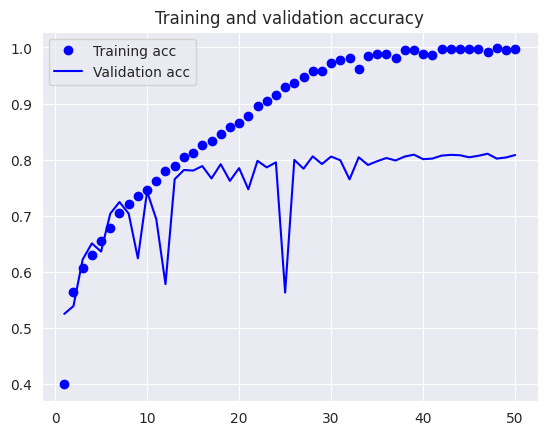

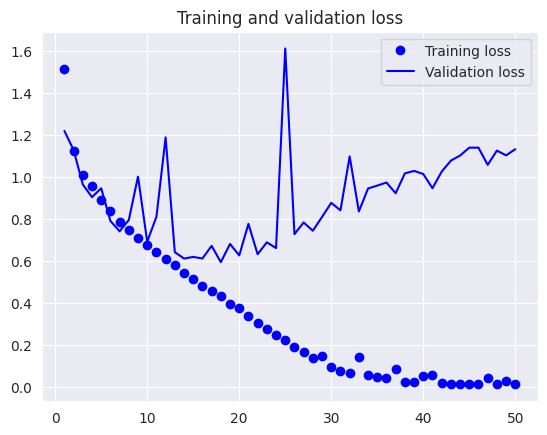

In [39]:
acc = history_CatCross_SGD.history['acc']
val_acc = history_CatCross_SGD.history['val_acc']
loss = history_CatCross_SGD.history['loss']
val_loss = history_CatCross_SGD.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Avaliação da performance do modelo no conjunto de teste, utilizando o relatório de classificação. O relatório apresenta, para cada classe, as métricas precision, recall e F1-score, permitindo analisar detalhadamente os acertos e erros por classe.

In [40]:
y_true, y_pred = get_true_pred(modelS_CatCross_SGD, test_dataset)
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
class_only_report = {k: v for k, v in report.items() if k in class_names}
df = pd.DataFrame(class_only_report).T
print(df[['precision', 'recall', 'f1-score']].round(3))


           precision  recall  f1-score
buildings      0.773   0.773     0.773
forest         0.883   0.937     0.909
glacier        0.689   0.826     0.752
mountain       0.777   0.758     0.768
sea            0.833   0.731     0.779
street         0.872   0.760     0.812


# Model (loss: KLDivergence, optimizer: RMSprop)

## Criação da CNN
Criação da CNN que  irá receber imagens de 150x150 píxeis, aplica normalização e passa por quatro camadas convolucionais com max pooling para extrair características, seguidas de uma camada densa com 512 unidades e uma camada de saída softmax para classificação.

In [54]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,686 (13.18 MB)

 Trainable params: 3,455,686 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

None


## Compilação da CNN
Compilação da CNN utilizando a loss **KLDivergence** e o optimizer **RMSprop**.

In [55]:
model.compile(
    loss=tf.keras.losses.KLDivergence(),
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

## Definição do callback
Definição de um callback que guarda automaticamente o modelo com a menor perda (loss) de validação durante o treino.

In [56]:
checkpoint_filepath = 'modelS_KLD_RMS.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True)

## Treino da CNN
Treino da CNN durante 50 épocas utilizando o dataset de validação e o callback para guardar o melhor modelo.

In [57]:
history_KLD_RMS = model.fit(
train_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=[model_checkpoint_callback])

Epoch 1/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - acc: 0.4663 - loss: 1.3290 - val_acc: 0.5753 - val_loss: 1.0506
Epoch 2/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - acc: 0.6347 - loss: 0.9598 - val_acc: 0.6423 - val_loss: 0.9260
Epoch 3/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - acc: 0.6871 - loss: 0.8445 - val_acc: 0.7303 - val_loss: 0.7340
Epoch 4/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - acc: 0.7180 - loss: 0.7534 - val_acc: 0.6693 - val_loss: 0.9300
Epoch 5/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - acc: 0.7488 - loss: 0.6864 - val_acc: 0.7473 - val_loss: 0.6989
Epoch 6/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - acc: 0.7696 - loss: 0.6371 - val_acc: 0.7650 - val_loss: 0.6384
Epoch 7/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - acc: 0.7939 - loss: 0.5875 - val_acc: 0.7540 - val_loss: 0.6796
Epoch 8/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - acc: 0.8059 - loss: 0.5519 - val_acc: 0.7943 - val_loss: 0.5728
Epoch 9/50
345/345 ━━━━━━━━━━━━━━━━━━━━ 

In [58]:
best_epoch = np.argmin(history_KLD_RMS.history['val_loss']) + 1
print(f"Melhor época (menor val_loss): {best_epoch}")

Melhor época (menor val_loss): 13


## Carregamento do modelo e validação
Carregamento e avaliação do modelo através do valor da accuracy.

In [59]:
modelS_KLD_RMS = keras.models.load_model('modelS_KLD_RMS.keras')
val_loss, val_acc = modelS_KLD_RMS.evaluate(validation_dataset)
print('val_acc:', val_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8298 - loss: 0.4612
val_acc: 0.8190000057220459


Representação gráfica dos valores da accuracy e da loss ao longo das épocas.

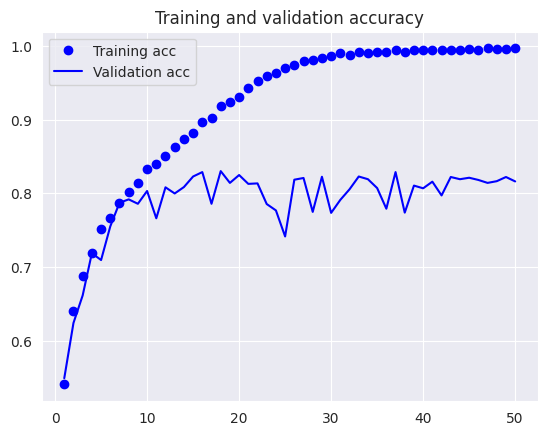

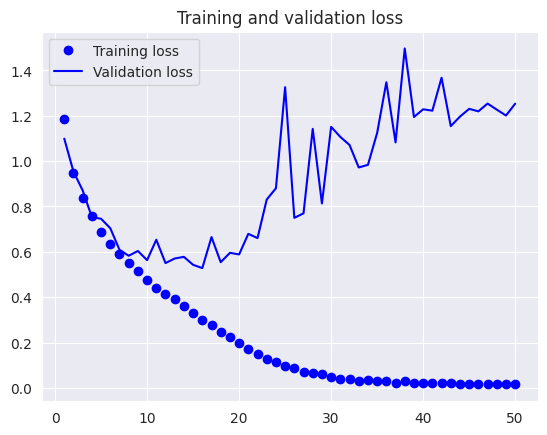

In [47]:
acc = history_KLD_RMS.history['acc']
val_acc = history_KLD_RMS.history['val_acc']
loss = history_KLD_RMS.history['loss']
val_loss = history_KLD_RMS.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Avaliação da performance do modelo no conjunto de teste, utilizando o relatório de classificação. O relatório apresenta, para cada classe, as métricas precision, recall e F1-score, permitindo analisar detalhadamente os acertos e erros por classe.

In [48]:
y_true, y_pred = get_true_pred(modelS_KLD_RMS, test_dataset)
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
class_only_report = {k: v for k, v in report.items() if k in class_names}
df = pd.DataFrame(class_only_report).T
print(df[['precision', 'recall', 'f1-score']].round(3))

           precision  recall  f1-score
buildings      0.856   0.762     0.806
forest         0.945   0.941     0.943
glacier        0.819   0.759     0.788
mountain       0.820   0.773     0.796
sea            0.757   0.924     0.832
street         0.862   0.876     0.869


2025-06-12 21:22:56.730716: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# Avaliação do melhor modelo

## Comparação dos modelos utilizando a accuracy

In [60]:
val_loss_CatCross_RMS, val_acc_CatCross_RMS = modelS_CatCross_RMS.evaluate(validation_dataset)
val_loss_CatCross_SGD, val_acc_CatCross_SGD = modelS_CatCross_SGD.evaluate(validation_dataset)
val_loss_KLD_RMS, val_acc_KLD_RMS = modelS_KLD_RMS.evaluate(validation_dataset)
val_loss_KLD_SGD, val_acc_KLD_SGD = modelS_KLD_SGD.evaluate(validation_dataset)

print("Validation Accuracy dos modelos:")
print(f"CatCross + RMSprop: {val_acc_CatCross_RMS:.4f}")
print(f"CatCross + SGD    : {val_acc_CatCross_SGD:.4f}")
print(f"KLD      + RMSprop: {val_acc_KLD_RMS:.4f}")
print(f"KLD      + SGD    : {val_acc_KLD_SGD:.4f}")

results = {
    'CatCross_RMS': val_acc_CatCross_RMS,
    'CatCross_SGD': val_acc_CatCross_SGD,
    'KLD_RMS': val_acc_KLD_RMS,
    'KLD_SGD': val_acc_KLD_SGD
}

# Identificação do melhor modelo com base na maior val_accuracy
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print(f"\nMelhor modelo: {best_model} com val_accuracy = {best_accuracy:.4f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8302 - loss: 0.4853
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.7917 - loss: 0.5884
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.8339 - loss: 0.4576
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - acc: 0.7844 - loss: 0.5841
Validation Accuracy dos modelos:
CatCross + RMSprop: 0.8250
CatCross + SGD    : 0.7920
KLD      + RMSprop: 0.8190
KLD      + SGD    : 0.7810

Melhor modelo: CatCross_RMS com val_accuracy = 0.8250


## Matriz de confusão do melhor modelo

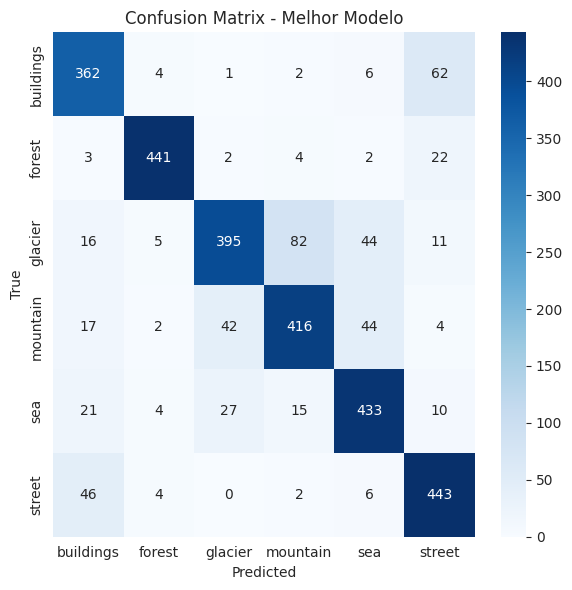

In [52]:
y_true, y_pred = get_true_pred(modelS_CatCross_RMS, test_dataset)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Melhor Modelo')
plt.tight_layout()
plt.show()

## Calcular saída do modelo para uma imagem

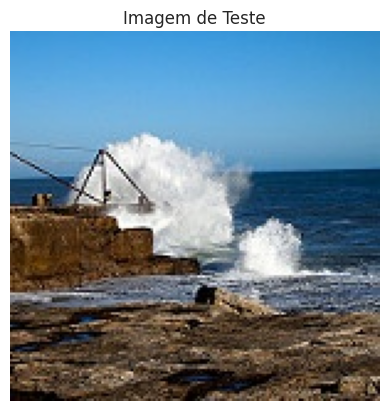

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Probabilidades por classe:
 buildings: 0.1919
    forest: 0.0034
   glacier: 0.0611
  mountain: 0.0504
       sea: 0.6622
    street: 0.0311

Classe prevista: sea (0.6622)


In [61]:
img_path = 'Dataset/archive/seg_test/sea/20072.jpg'

img = tf.keras.preprocessing.image.load_img(
    img_path,
    target_size=(150, 150),
    interpolation='bilinear'
)

plt.imshow(img)
plt.axis('off')
plt.title("Imagem de Teste")
plt.show()

img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

result = modelS_CatCross_RMS.predict(img_array)

class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
print("Probabilidades por classe:")
for i, prob in enumerate(result[0]):
    print(f"{class_names[i]:>10s}: {prob:.4f}")


predicted_class = np.argmax(result)
print(f"\nClasse prevista: {class_names[predicted_class]} ({result[0][predicted_class]:.4f})")

